# EDA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [31]:
# path to the source file
#path = '../../../archive/2020/heart_2020_cleaned.csv'
path = 'cardio_train.csv'

In [52]:
#Helper Methods that will be used for the eda
def dublicate_check(df: pd.DataFrame):
    count_duplicates = df.duplicated().sum()
    print(f'The dataset has {count_duplicates} duplicates')
    df = df.drop_duplicates()
    print(f'{count_duplicates} have been removed from the dataset')
    return df

def corr_matrix(df: pd.DataFrame):
    only_numeric_df = df.select_dtypes(include='number')
    correlation_matrix = only_numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

def plot_numerical_coloumns(df: pd.DataFrame):
    numerical_cols = df.select_dtypes(include='number').columns

    if len(numerical_cols) == 0: # binary columns are categorical so leave them out
        print("No numerical columns found in the DataFrame.")
        return

    for col in numerical_cols:
        if (len(df[col].unique()) > 2): # Columns with only 2 unique numerical values should be skipped (Example Yes No has been converted to 1 and 0)
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Eine Figur mit 1 Zeile, 2 Spalten
            # Histogram und KDE im ersten Subplot
            sns.histplot(df[col], kde=True, bins=30, color='blue', edgecolor='black', ax=axes[0])
            axes[0].set_title(f"Distribution of {col}")
            axes[0].set_xlabel(col)
            axes[0].set_ylabel("Frequency")
            axes[0].grid(True)

            # Boxplot im zweiten Subplot
            sns.boxplot(x=df[col], color='orange', ax=axes[1])
            axes[1].set_title(f"Boxplot for {col}")
            axes[1].set_xlabel(col)
            axes[1].grid(True)

            # Layout optimieren und anzeigen
            plt.tight_layout()
            plt.show()

def plot_valueCount_categorical(df: pd.DataFrame):
    categorical_columns = df.select_dtypes(include='object').columns

    if len(categorical_columns) == 0:
        print("No categorical columns found in the DataFrame.")
        return
    
    num_plots = len(categorical_columns)
    num_columns = 4
    rows = math.ceil(num_plots / num_columns)

    plt.figure(figsize=(18, rows * 6))

    for i, col in enumerate(categorical_columns):
        value_counts = df[col].value_counts()
        value_counts_df = value_counts.reset_index()
        value_counts_df.columns = [col, 'Count']  # Umbenennen für Klarheit

        plt.subplot(rows, num_columns, i + 1)
        sns.barplot(
            data=value_counts_df, 
            x=col, 
            y='Count', 
            hue=col,  
            dodge=False,  
            #palette="viridis", 
            legend=False  # Keine Legende anzeigen
        )
        plt.title(f"Value Counts of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(True, axis='y')
        
    plt.tight_layout()
    plt.show()

def print_categorical_col_and_values(df: pd.DataFrame):
    categorical_columns = df.select_dtypes(include='object').columns
    if len(categorical_columns) == 0:
        print("No categorical columns found in the DataFrame.")
        return
    for col in categorical_columns:
        print(f'Column: {col}, values: {df[col].unique()}')

def convert_YesNo_to_10(df: pd.DataFrame):
    categorical_columns = df.select_dtypes(include='object').columns
    
    if len(categorical_columns) == 0:
        print("No categorical columns found in the DataFrame.")
        return
    
    for col in categorical_columns:
        unique_values = set(df[col].dropna().unique())
        if unique_values == {'Yes', 'No'}:    
            df.loc[:,f'{col}_n'] = df[col].apply(lambda val: 0 if( val.lower() == 'no') else 1 if (val.lower() == 'yes') else  val)

    return df

def barplot_for_columns(df: pd.DataFrame, column1: str, column2: str):
    if column1 not in df.columns or column2 not in df.columns:
        print(f"Eine oder beide Spalten '{column1}' oder '{column2}' existieren nicht im DataFrame.")
        return
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column1, hue=column2, palette="viridis")
    
    plt.title(f"Bar Plot")
    plt.xlabel(column1)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title=column2)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, color='blue', marker='o', title=None):
    if x_col not in df.columns or y_col not in df.columns:
        print(f"Error: Spalten '{x_col}' oder '{y_col}' nicht im DataFrame gefunden.")
        return

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, color=color, marker=marker, edgecolor='black')

    plt.title(title if title else f"Scatterplot: {x_col} vs {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()




In [33]:
df = pd.read_csv(path,sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
df = df.drop(columns=['id'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [36]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df.describe(include='object')

ValueError: No objects to concatenate

In [38]:
df = dublicate_check(df)

The dataset has 24 duplicates
24 have been removed from the dataset


In [39]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [40]:
print_categorical_col_and_values(df)

No categorical columns found in the DataFrame.


In [46]:
#df = convert_YesNo_to_10(df)
df.loc[:,'age'] = df['age'] / 365

df.loc[:,'gender'] = df['gender'].apply(lambda val: 0 if (val == 1) else 1 if (val == 2) else val)
#df

In [ ]:
#Define Mapping for categorical column and apply it on new column
# 1. 'AgeCategory' - aufsteigend nach Alter
AgeCategory_mapping = {
    '18-24': 18,
    '25-29': 25,
    '30-34': 20,
    '35-39': 35,
    '40-44': 40,
    '45-49': 45,
    '50-54': 50,
    '55-59': 55,
    '60-64': 60,
    '65-69': 65,
    '70-74': 70,
    '75-79': 75,
    '80 or older': 80
}
df.loc[:,'AgeCategory_n'] = df['AgeCategory'].map(AgeCategory_mapping)
# 2. 'Race' 
Race_mapping = {
    'American Indian/Alaskan Native': 0,
    'Asian': 1,
    'Black': 2,
    'Hispanic': 3,
    'Other': 4,
    'White': 5
}
df.loc[:,'Race_n'] = df['Race'].map(Race_mapping)
# 3. 'Diabetic' - aufsteigend nach Diabeteszustand
Diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes': 2,
    'Yes (during pregnancy)': 3
}
df.loc[:,'Diabetic_n'] = df['Diabetic'].map(Diabetic_mapping)
# 4. 'GenHealth' - aufsteigend nach Gesundheitseinstufung
GenHealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df.loc[:,'GenHealth_n'] = df['GenHealth'].map(GenHealth_mapping)
df


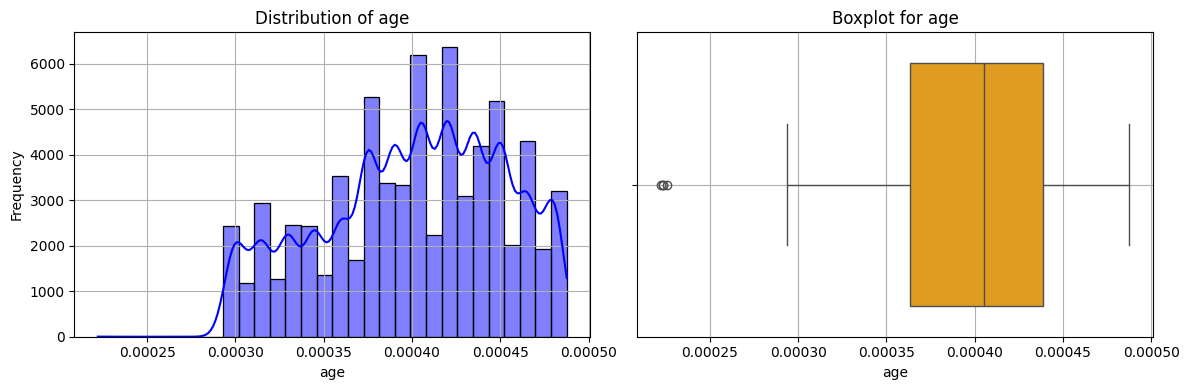

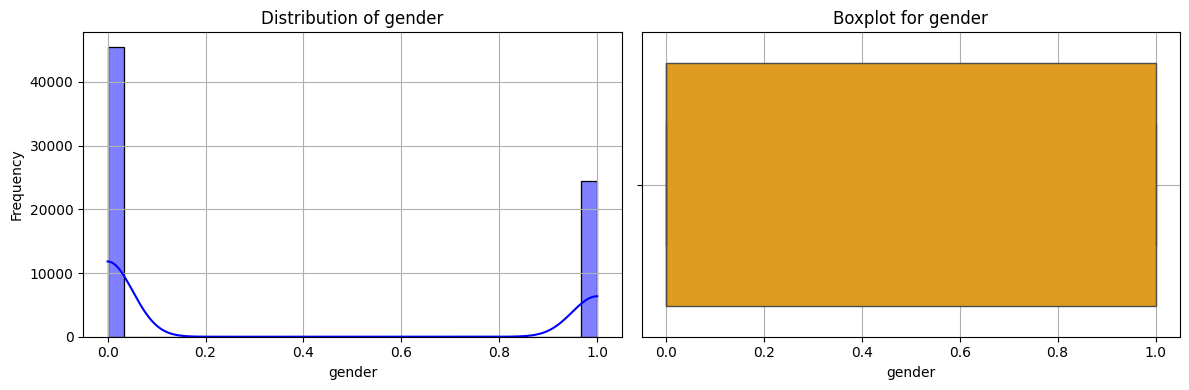

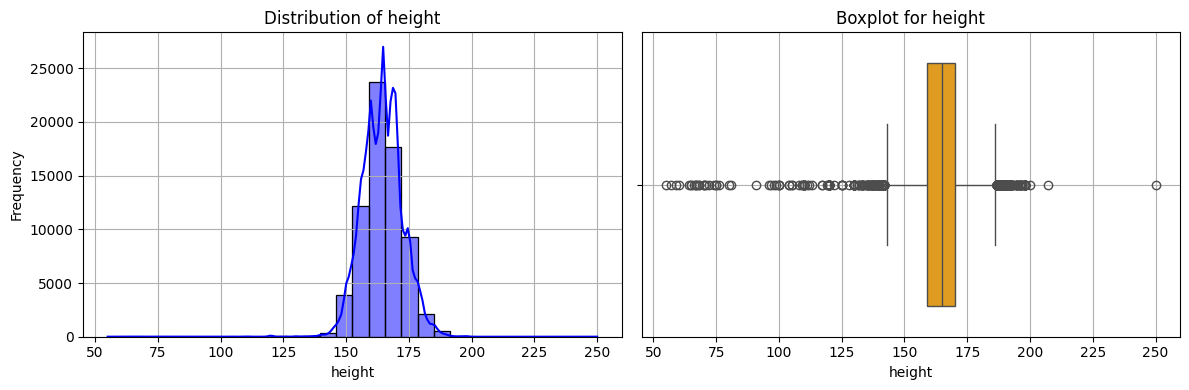

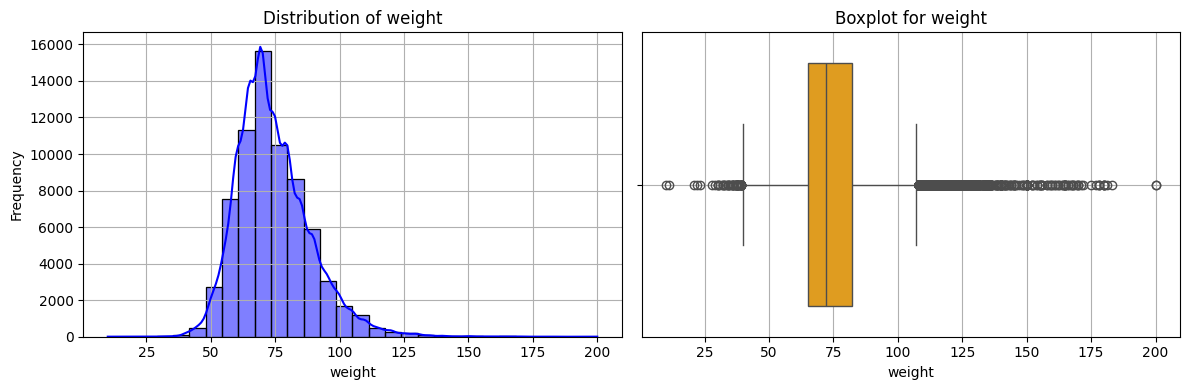

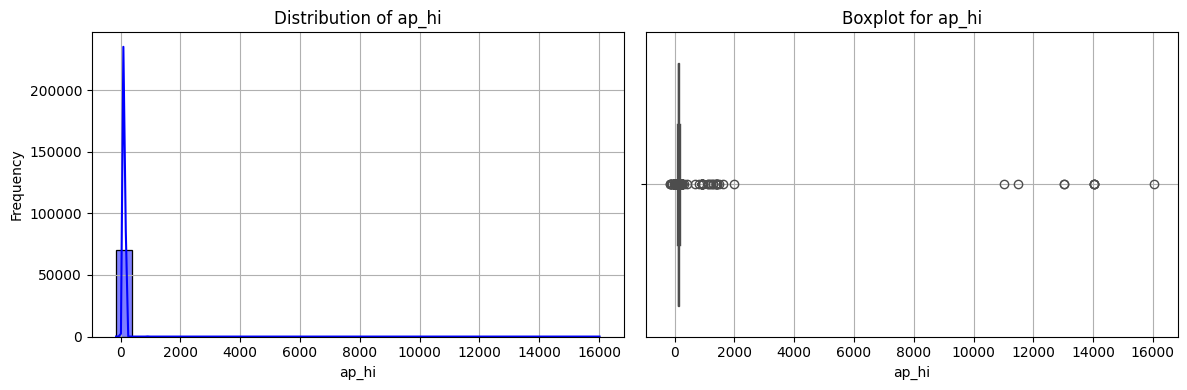

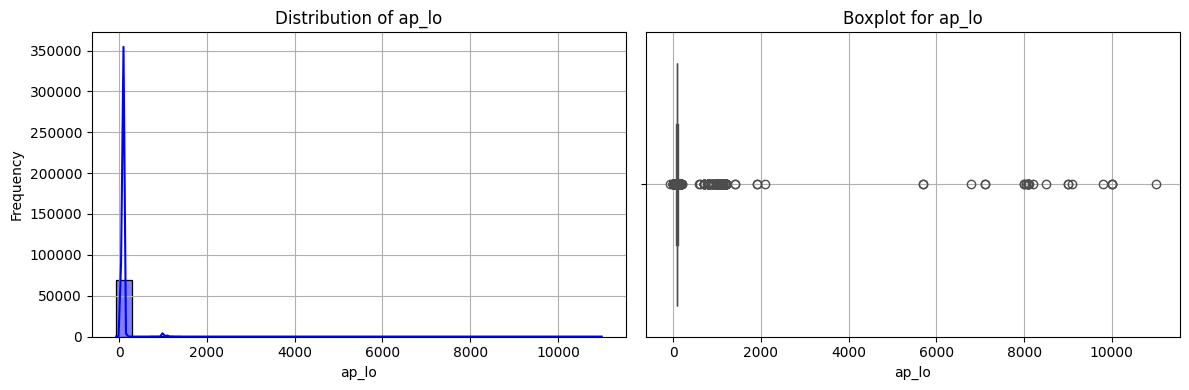

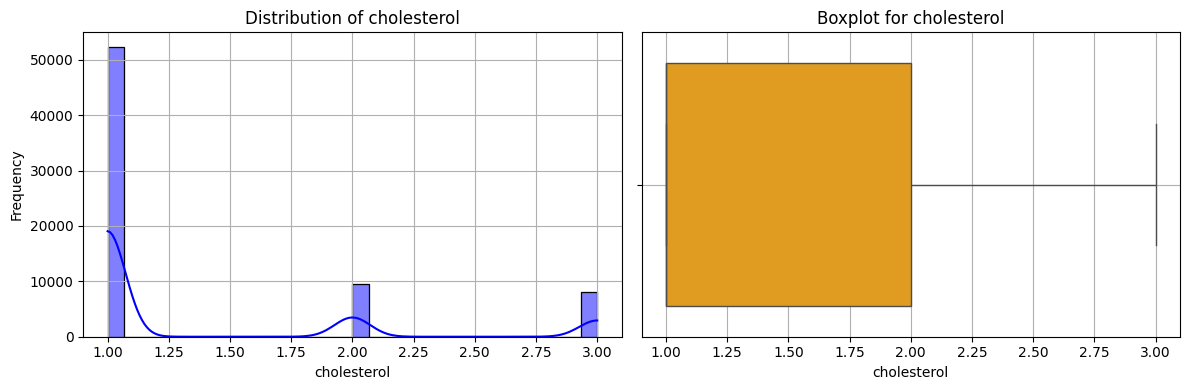

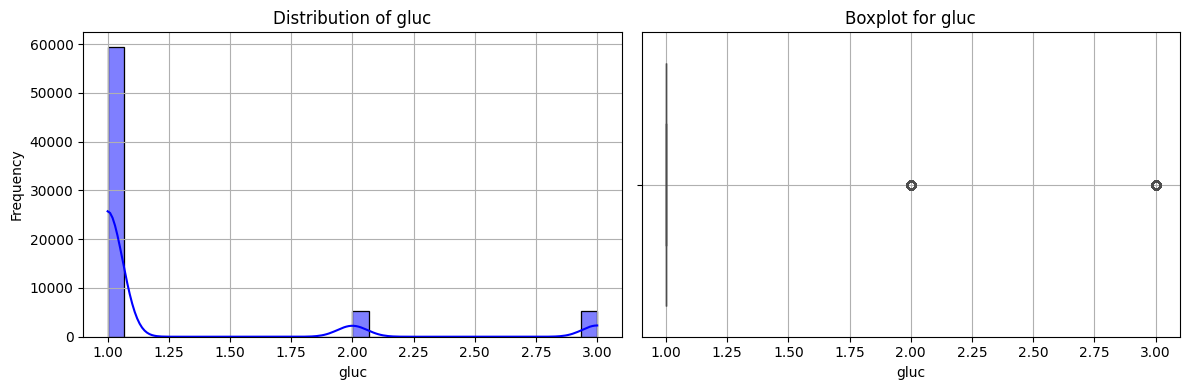

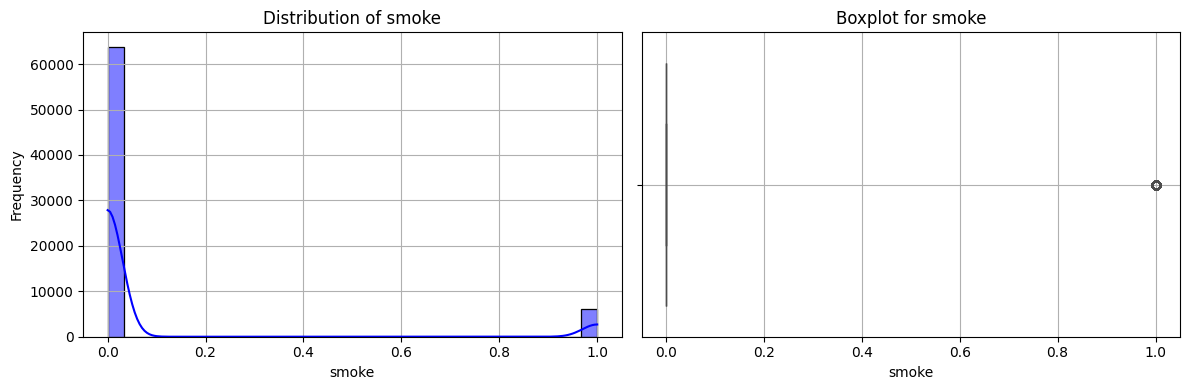

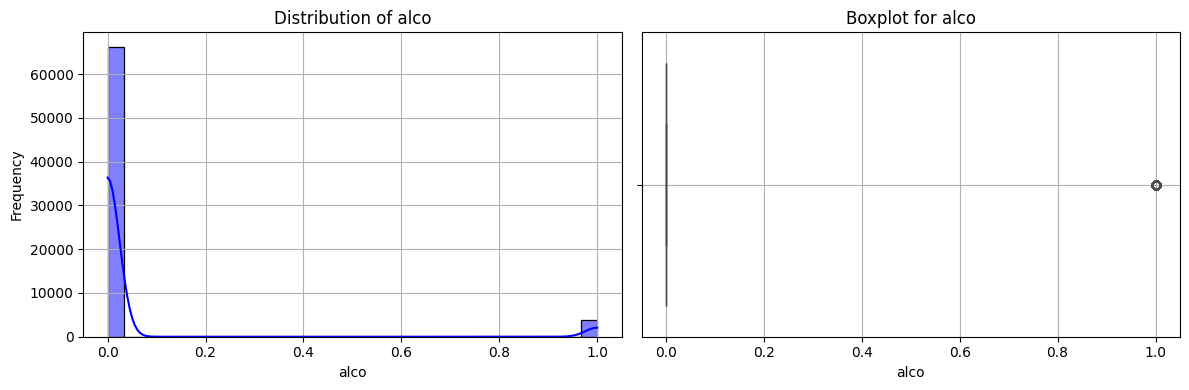

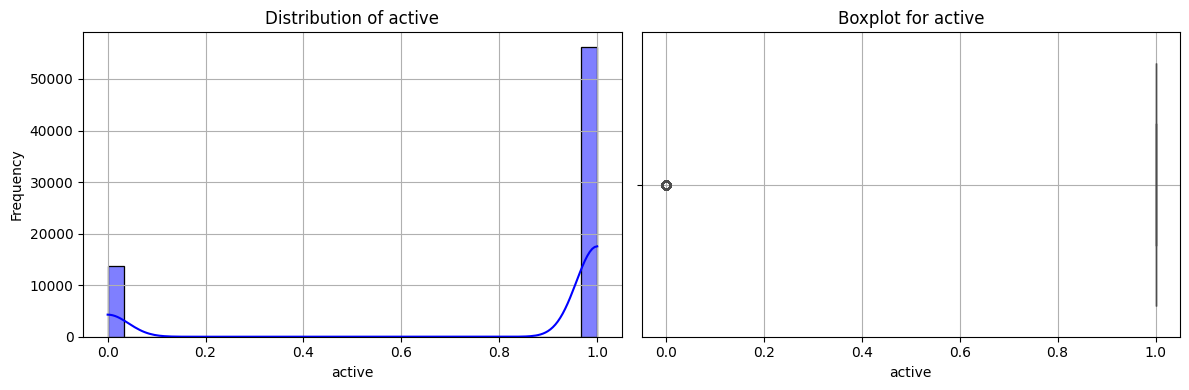

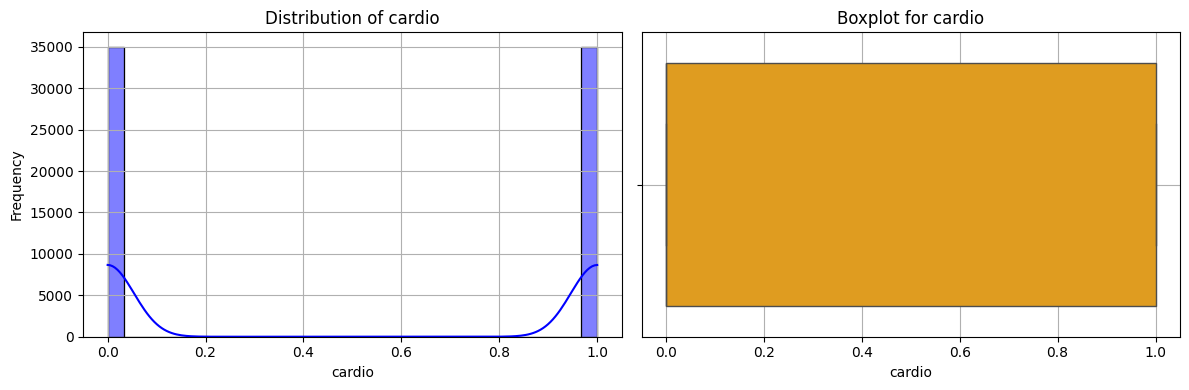

In [47]:
plot_numerical_coloumns(df)

In [48]:
plot_valueCount_categorical(df)

No categorical columns found in the DataFrame.


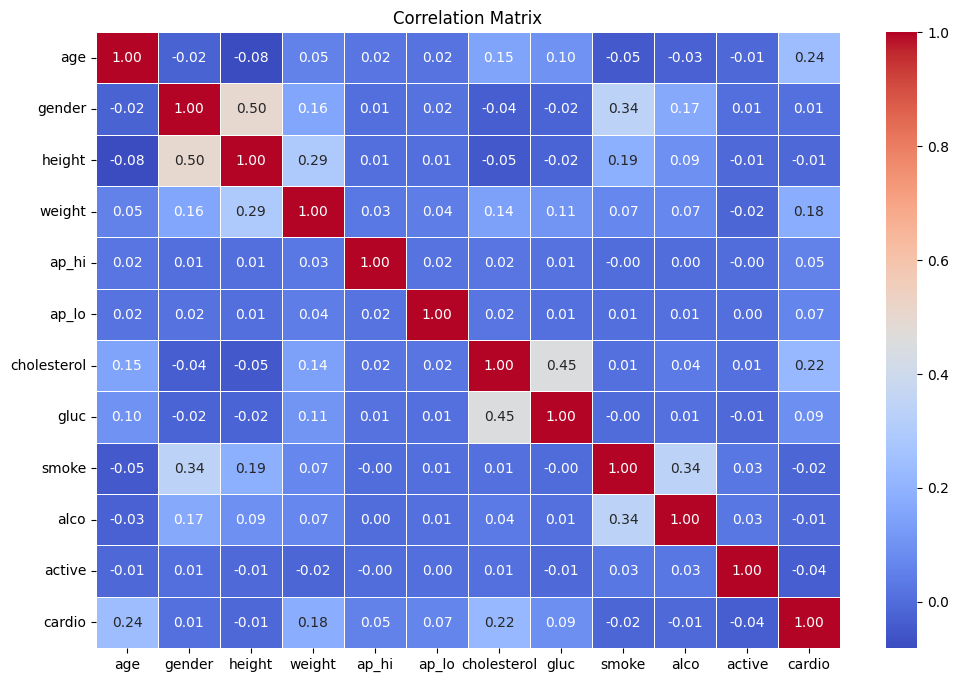

In [49]:
corr_matrix(df)

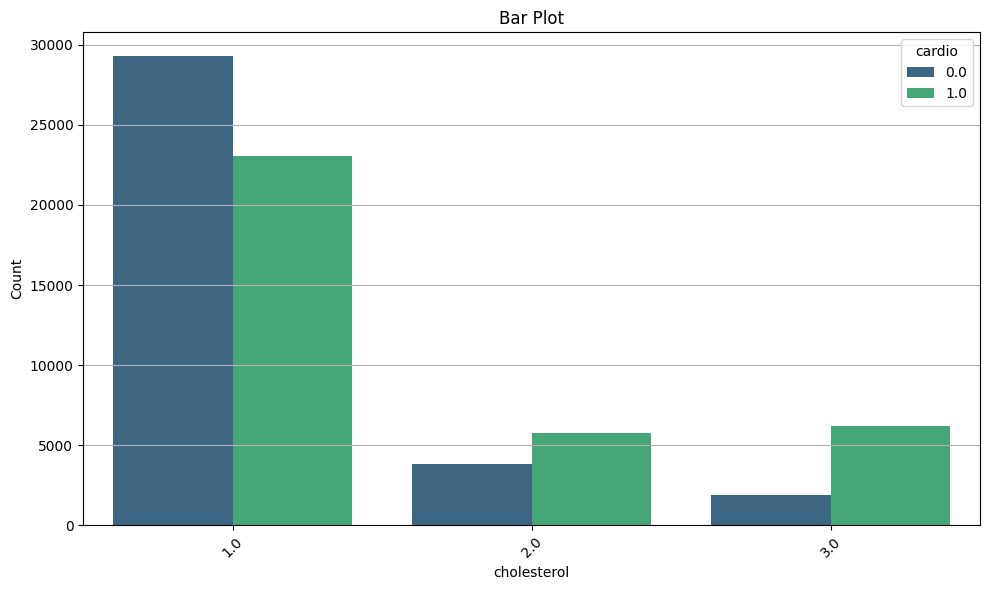

In [60]:
#barplot_for_columns(df, 'AgeCategory_n','HeartDisease_n')
barplot_for_columns(df, 'cholesterol','cardio')

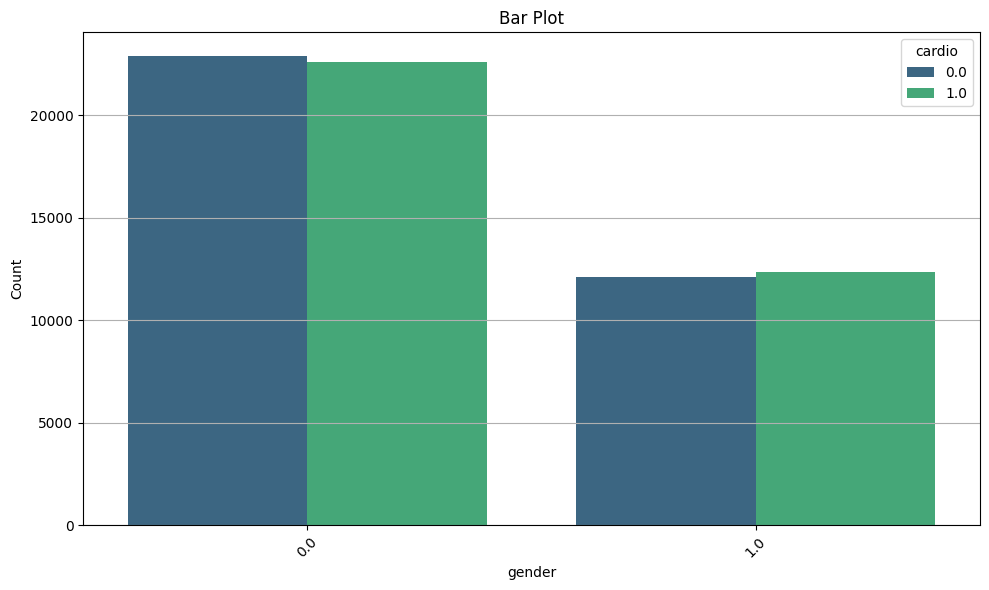

In [55]:
barplot_for_columns(df, 'gender','cardio')


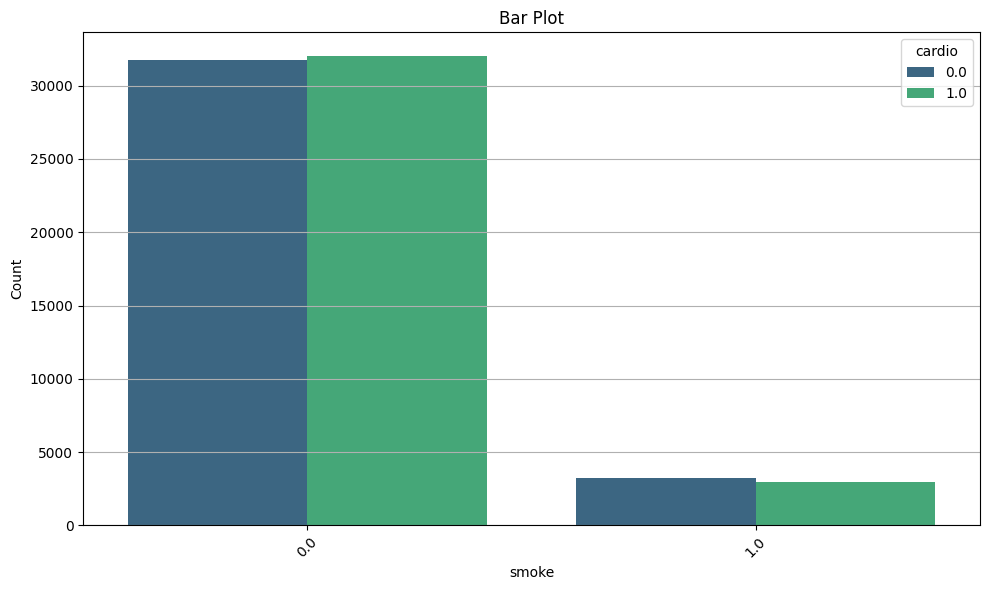

In [57]:
barplot_for_columns(df, 'smoke','cardio')

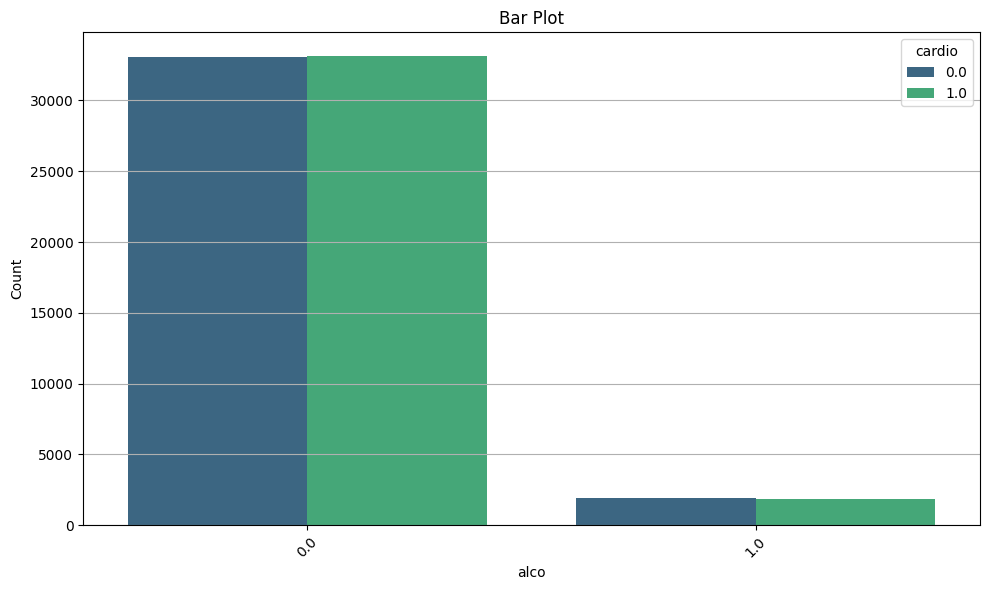

In [58]:
barplot_for_columns(df, 'alco','cardio')